# Task 1:
Data cleansing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Task 1 - Data Wrangling

<p style="font-size:17px;font-weight:bold">Task 1.1 - Covid-data<p>

In [3]:
df = pd.read_csv("covid-data.csv")
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0.0,0.0,0.0,0.0,44648.710,25499881.0
1,Australia,2020-01-01,0.0,0.0,0.0,0.0,44648.710,25499881.0
2,Australia,2020-01-02,0.0,0.0,0.0,0.0,44648.710,25499881.0
3,Australia,2020-01-03,0.0,0.0,0.0,0.0,44648.710,25499881.0
4,Australia,2020-01-04,0.0,0.0,0.0,0.0,44648.710,25499881.0
...,...,...,...,...,...,...,...,...
1570,United States,2020-07-10,3118008.0,63004.0,133291.0,982.0,54225.446,331002647.0
1571,United States,2020-07-11,3184633.0,66625.0,134097.0,806.0,54225.446,331002647.0
1572,United States,2020-07-12,3247684.0,63051.0,134814.0,717.0,54225.446,331002647.0
1573,United States,2020-13-07,3304942.0,57258.0,135205.0,391.0,54225.446,331002647.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1575 non-null   object 
 1   date            1575 non-null   object 
 2   total_cases     1575 non-null   float64
 3   new_cases       1575 non-null   float64
 4   total_deaths    1569 non-null   float64
 5   new_deaths      1568 non-null   float64
 6   gdp_per_capita  1575 non-null   float64
 7   population      1575 non-null   float64
dtypes: float64(6), object(2)
memory usage: 98.6+ KB


`df.info` provides a concise look at any null-values that exists. 

In [4]:
df[df['total_deaths'].isnull() == True]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
250,China,2020-02-22,76369.0,826.0,NaN,109.0,15308.712,1.439324e+09
650,Iran,2020-02-28,245.0,106.0,NaN,7.0,19082.620,8.399295e+07
680,Iran,2020-03-29,35408.0,3076.0,NaN,139.0,19082.620,8.399295e+07
850,Italy,2020-03-02,1689.0,561.0,NaN,6.0,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,NaN,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,NaN,NaN,54225.446,3.310026e+08


In [5]:
for i in df[df['total_deaths'].isnull() == True].index: #i is index of rows with null values in total_deaths
        df.loc[i,'total_deaths'] = df.loc[i+1,'total_deaths'] - abs(df.loc[i+1,'new_deaths']) 


To impute the null values in column `total_deaths` and `new_deaths`, we use the above function. After obtaining the row index which contains the missing value, `total_deaths` is calculated by subtracting the value of `new_deaths` from `total_deaths` in the next row.

In [6]:
df[df['new_deaths'].isnull() == True]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
100,Australia,2020-04-09,6052.0,96.0,50.0,NaN,44648.710,2.549988e+07
300,China,2020-04-12,83097.0,93.0,3343.0,NaN,15308.712,1.439324e+09
500,France,2020-04-15,103573.0,5497.0,15729.0,NaN,38605.671,6.527351e+07
700,Iran,2020-04-18,79494.0,1499.0,4958.0,NaN,19082.620,8.399295e+07
900,Italy,2020-04-21,181228.0,2256.0,24114.0,NaN,35220.084,6.046183e+07
1200,United Kingdom,2020-01-19,0.0,0.0,0.0,NaN,39753.244,6.788600e+07
1500,United States,2020-05-01,1069826.0,29917.0,63006.0,NaN,54225.446,3.310026e+08


In [7]:
for i in df[df['new_deaths'].isnull() == True].index:
    df.loc[i,'new_deaths'] = df.loc[i,'total_deaths'] - df.loc[i-1,'total_deaths']

Similar to finding `total_deaths`, `new_deaths` is calculated through finding the difference between the current and previous `total_deaths`. As seen in the `.info()` function above, all null values are corrected.

In [8]:
df['location'].value_counts()

France            197
Spain             196
Australia         190
China             189
Italy             185
Iran              185
United States     182
United Kingdom    179
UnitedKingdom      18
United Stats       15
Itly               12
iran               12
 China              8
Australia           7
Name: location, dtype: int64

In [9]:
df.loc[df['location'] == 'UnitedKingdom','location'] = 'United Kingdom'
df.loc[df['location'] == 'United Stats','location'] = 'United States'
df.loc[df['location'] == 'iran','location'] = 'Iran'
df.loc[df['location'] == 'Itly','location'] = 'Italy'
df.loc[df['location'] == ' China','location'] = 'China'
df.loc[df['location'] == 'Australia  ','location'] = 'Australia'

Moving from null values, the dataframe is examined column by column starting with `location`. From `.value_counts()`, it is observed that some rows contain spelling errors and variations. Therefore the errors are fixed manually and spellings with less frequencies are edited to match those with higher frequencies.

In [10]:
for indx,row in df.iterrows(): #indx is index of every row, r access the data of each row
    temp = row[1].split("-")
    if int(temp[1]) > 12:
        df.loc[indx,'date'] = temp[0] +'-'+temp[2]+'-'+ temp[1] 

In [11]:
df['date'] = pd.to_datetime(df['date'])

Moving to the `date` column, there are inconsistencies in the date format, resulting in some rows with a Month value exceeding 12. To correct this, a `For` loop is used, where each date is formatted into an array separated with its dash symbol. For any date with its month exceeding 12, the values are swapped into the `yy/mm/dd` format. Furthermore, the date column is changed into the `datetime` object type.

In [12]:
df[df['total_cases'] < 0].count()

location          0
date              0
total_cases       0
new_cases         0
total_deaths      0
new_deaths        0
gdp_per_capita    0
population        0
dtype: int64

Text(0.5, 1.0, 'Total cases over time')

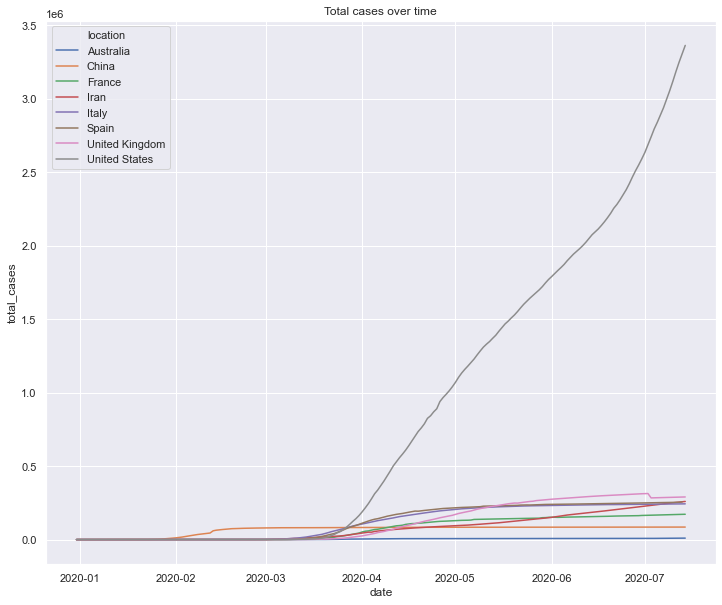

In [13]:
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x = 'date', y = 'total_cases',data= df,hue = 'location')
plt.title('Total cases over time')

Moving onto the `total_cases` column, we check for any anomalies through checking negative values and plotting a line chart. We filter out United States in order to take a closer look into other countries.

Text(0.5, 1.0, 'Total cases over time excluding United States')

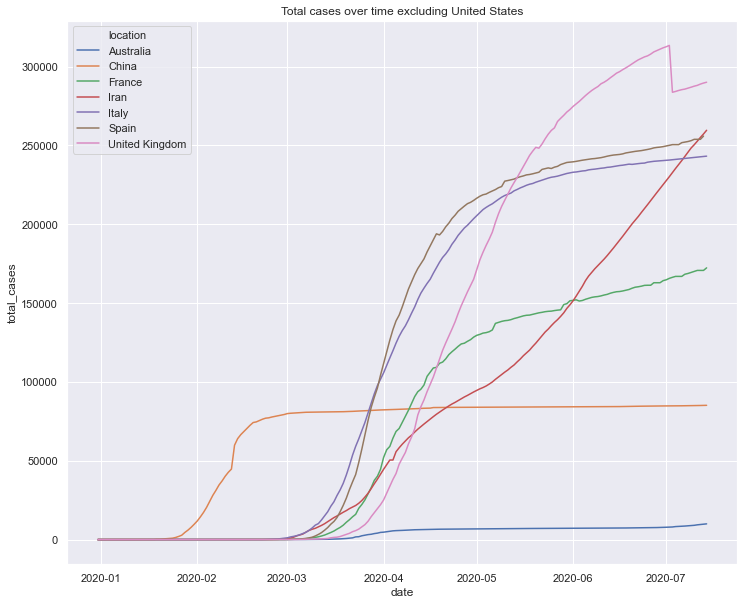

In [14]:
sns.lineplot(x='date', y = 'total_cases' , data= df.loc[~(df['location'] == 'United States')],hue='location')
plt.title('Total cases over time excluding United States')

Since `total_cases` is cumulative, the graph should not show any negative gradient. However, it is observed that there are such negative gradients on the lines in the graph, such as United Kingdom and France.

In [15]:
df[df['location'] == 'United Kingdom'].tail(15)

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1363,United Kingdom,2020-06-30,311965.0,814.0,43575.0,25.0,39753.244,67886004.0
1364,United Kingdom,2020-07-01,312654.0,689.0,43730.0,155.0,39753.244,67886004.0
1365,United Kingdom,2020-07-02,313483.0,829.0,43906.0,176.0,39753.244,67886004.0
1366,United Kingdom,2020-07-03,283757.0,-29726.0,43995.0,89.0,39753.244,67886004.0
1367,United Kingdom,2020-07-04,284276.0,519.0,44131.0,136.0,39753.244,67886004.0
1368,United Kingdom,2020-07-05,284900.0,624.0,44198.0,67.0,39753.244,67886004.0
1369,United Kingdom,2020-07-06,285416.0,516.0,44220.0,22.0,39753.244,67886004.0
1370,United Kingdom,2020-07-07,285768.0,352.0,44236.0,16.0,39753.244,67886004.0
1371,United Kingdom,2020-07-08,286349.0,581.0,44391.0,155.0,39753.244,67886004.0
1372,United Kingdom,2020-07-09,286979.0,630.0,44517.0,126.0,39753.244,67886004.0


In [16]:
df[df['new_cases'] < 0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
549,France,2020-06-03,151325.0,-766.0,28940.0,107.0,38605.671,65273512.0
960,Italy,2020-06-20,238011.0,-148.0,34561.0,47.0,35220.084,60461828.0
1095,Spain,2020-04-19,193252.0,-713.0,20453.0,410.0,34272.360,46754783.0
1131,Spain,2020-05-25,235400.0,-372.0,26834.0,-1918.0,34272.360,46754783.0
1323,United Kingdom,2020-05-21,248293.0,-525.0,35704.0,363.0,39753.244,67886004.0
1366,United Kingdom,2020-07-03,283757.0,-29726.0,43995.0,89.0,39753.244,67886004.0


In [17]:
for i,r in df[(df['new_cases'] < 0) & ~(df.index == 1131)].iterrows(): # obtain data with negative new cases,excluding Spain 
    df.loc[i,'new_cases'] = abs(df.loc[i,'new_cases']) #Correct negative values
    for indx in range(i,df[df['location'] == r[0]].index.max()+1):
        df.loc[indx,'total_cases'] = df.loc[indx-1,'total_cases'] + abs(df.loc[indx,'new_cases']) #set new value for total cases

To observe what has caused the error, the last few rows of data related to United Kingdom are listed out. It is shown that a negative value in `new_cases` caused the decrease in value. Similar to `total_cases`, `new_cases` should only have positive values. However this isn't the case for Spain, as according to Allen and Khalip (2020), Spain revised its COVID-19 numbers on May 25th, which resulted in the decrease in total and new cases. Therefore, the row on May 25th for Spain is valid whereas the remaining rows needed correction.

Firstly, invalid negative values are corrected. Then,starting from the index which contains negative `new_cases` values, the function sets the current `total_cases` by the sum of the previous `total_cases` and the absolute value of the current `new_cases`. This repeats for the remaining index until the maximum index of the specific country.

In [18]:
df[df['new_deaths'] < 0]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
965,Italy,2020-06-25,239706.0,577.0,34644.0,-31.0,35220.084,60461828.0
1131,Spain,2020-05-25,237570.0,-372.0,26834.0,-1918.0,34272.360,46754783.0


In [19]:
for i,r in df[df.index == 965].iterrows():
    df.loc[i,'new_deaths'] = abs(df.loc[i,'new_deaths'])
    for indx in range(i,df[df['location'] == r[0]].index.max()+1):
        df.loc[indx,'total_deaths'] = df.loc[indx-1,'total_deaths'] + abs(df.loc[indx,'new_deaths'])

Text(0.5, 1.0, 'total deaths over time')

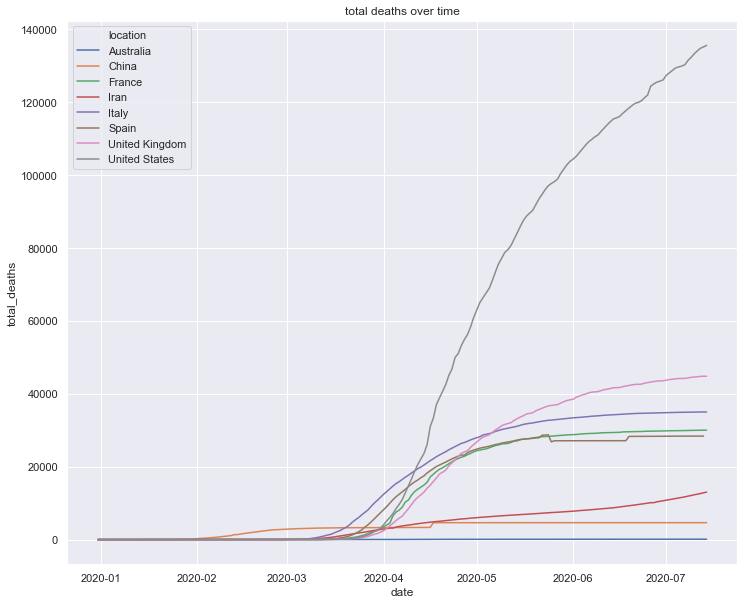

In [20]:
sns.lineplot(x = 'date', y = 'total_deaths',data= df,hue = 'location')
plt.title('total deaths over time')

Similar to `total_cases` and `new_cases`, we check `new_deaths` for any negative values. As explained previously in the case of Spain, we only need to correct the values of row 965.

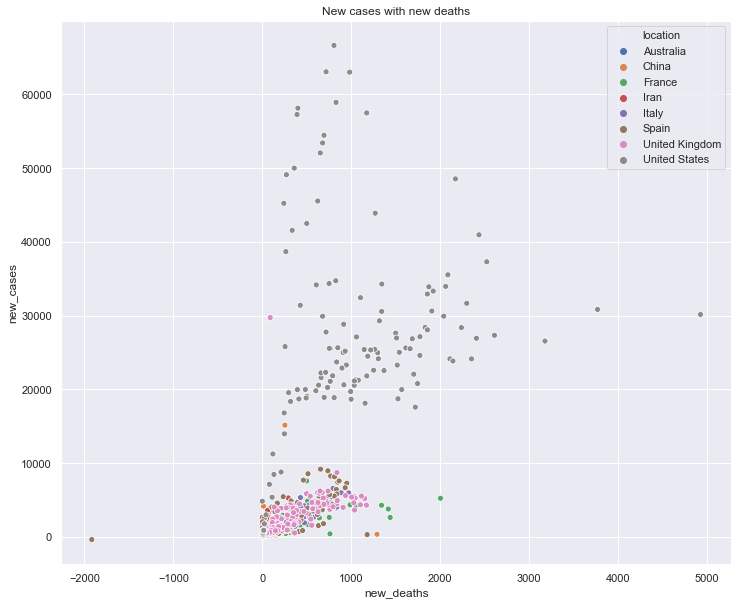

In [21]:
sns.scatterplot(x='new_deaths',y='new_cases',data=df,hue='location')
plt.title('New cases with new deaths')
plt.show()

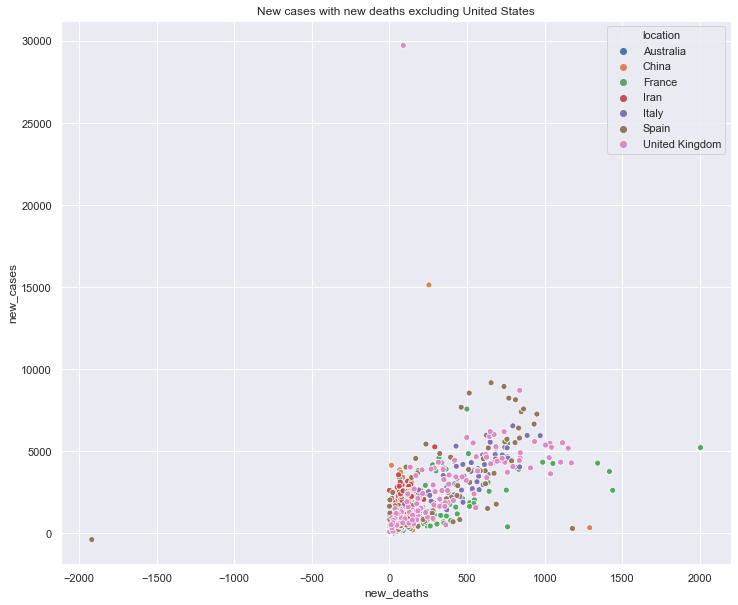

In [22]:
sns.scatterplot(x='new_deaths',y='new_cases',data=df[~(df['location']=='United States')],hue='location')
plt.title('New cases with new deaths excluding United States')
plt.show()

After that, we start to look at the values of `new_deaths` and `new_cases` for any outliers that might be an error. To do this, scatterplots are used. 

At first glance, we can see that United Kingdom, China, France and Spain all have significant outliers compared to the rest of the data.Therefore, these countries are all examined for any errors. The method used to determine errors is to research the dates where the outliers occur and checking for news articles that mentions those dates. 

After investigating the dates, only United Kingdom appear to be an error. The reason behind Spain is explained above and the outlier for China will be explored in detail below. 

In [23]:
df[(df['location'] == 'France') & (df['new_deaths'] > 1500)]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
489,France,2020-04-04,64338.0,5233.0,6507.0,2004.0,38605.671,65273512.0


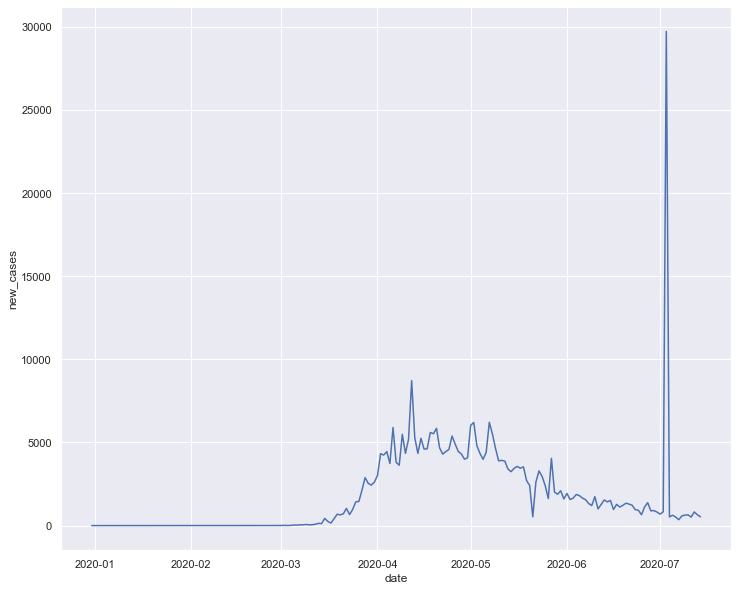

In [24]:
sns.lineplot(x='date',y='new_cases',data=df[df['location']=='United Kingdom'])

In [25]:
df[(df['location'] == 'United Kingdom') & (df['new_cases'] > 25000)]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
1366,United Kingdom,2020-07-03,344259.0,29726.0,43995.0,89.0,39753.244,67886004.0


In [26]:
df[df['location'] == 'United Kingdom'].new_cases.mean()

1779.8730964467004

In [27]:
df.loc[1366,'new_cases'] = 1780

In [28]:
for indx in range(1366,df[df['location'] == 'United Kingdom'].index.max()+1):
    df.loc[indx,'total_cases'] = df.loc[indx-1,'total_cases'] + abs(df.loc[indx,'new_cases'])

After obtaining the specific row of the outlier in United Kingdom, its value for `new_cases` is modified, as it showed a large increase in the line chart. The value is subsituted with the mean of `new_cases` for the country

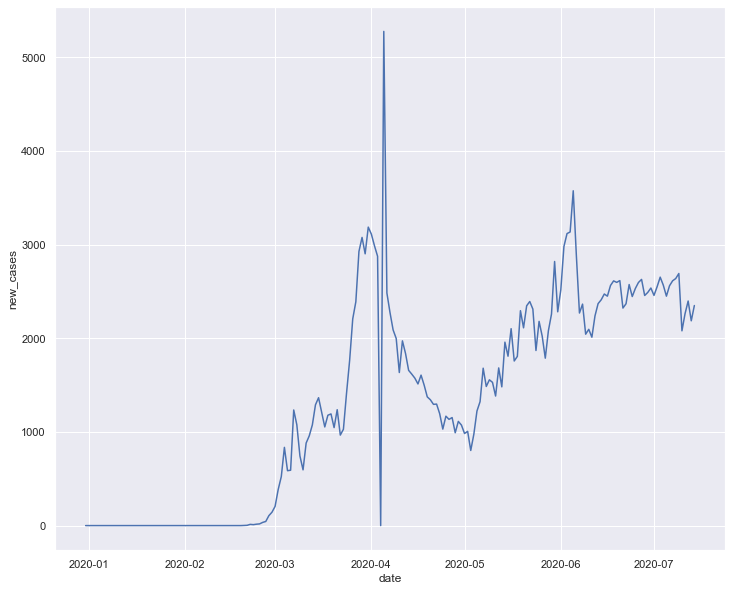

In [29]:
sns.lineplot(x='date',y='new_cases',data=df[df['location']=='Iran'])

In [30]:
df[(df['location'] == 'Iran') & (df['new_cases'] == 0) & (df['date'] > '2020-04-01')]

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
686,Iran,2020-04-04,50468.0,0.0,3160.0,0.0,19082.62,83992953.0


In [31]:
df[(df['location'] == 'Iran')].new_cases.mean()

1318.030456852792

In [32]:
df.loc[686,'new_cases'] = 1318

While examinging the `new_cases` column for any irregular values, the line chart of Iran indicated a steep negative gradient in which its new cases recorded zero. This is believed to be an error as it has recorded high numbers of new cases consecutively. Therefore, the specific data is replaced with the mean of new cases.

In [33]:
df.groupby('location')["gdp_per_capita"].unique()

location
Australia          [44648.71]
China             [15308.712]
France            [38605.671]
Iran               [19082.62]
Italy             [35220.084]
Spain              [34272.36]
United Kingdom    [39753.244]
United States     [54225.446]
Name: gdp_per_capita, dtype: object

In [34]:
df.groupby('location')["population"].unique()

location
Australia           [25499881.0]
China             [1439323774.0]
France              [65273512.0]
Iran                [83992953.0]
Italy               [60461828.0]
Spain               [46754783.0]
United Kingdom      [67886004.0]
United States      [331002647.0]
Name: population, dtype: object

Lastly, to check for errors in the `population` and `gdp_per_capita` columns, each columns are checked for unique values. Since each countrys' population and GDP remain constant, there should only be one value corresponding to each country. 

<p style="font-size:17px;font-weight:bold">Task 1.2 Country Lockdown Dates</p>

In [35]:
df2 = pd.read_csv("CountryLockdowndates.csv")

In [36]:
df2

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
...,...,...,...,...,...
302,Venezuela,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
303,Vietnam,NaN,19/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
304,West Bank and Gaza,NaN,05/03/2020,Full,NaN
305,Zambia,NaN,NaN,None,NaN


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  307 non-null    object
 1   Province        129 non-null    object
 2   Date            230 non-null    object
 3   Type            307 non-null    object
 4   Reference       238 non-null    object
dtypes: object(5)
memory usage: 12.1+ KB


In [38]:
for indx,row in df2[~(df2['Date'].isnull() == True)].iterrows(): #Changes date format of non-null entries
    temp = row[2].split("/")
    df2.loc[indx,'Date'] = temp[2] +'-'+temp[1]+'-'+ temp[0] 

In [39]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [40]:
df2['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Cote dIvoire', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

In [41]:
lockdown_data = df2[df2['Country/Region'].isin([i for i in df['location']]+['US'])].groupby('Country/Region')['Date'].min()
lockdown_data

Country/Region
Australia        2020-03-24
China            2020-01-23
France           2020-03-16
Iran             2020-03-15
Italy            2020-03-11
Spain            2020-03-14
US               2020-03-13
United Kingdom   2020-03-18
Name: Date, dtype: datetime64[ns]

In [42]:
df3 = pd.DataFrame({'location':lockdown_data.index, 'lockdown_date':lockdown_data.values})
df3.loc[6,'location'] = 'United States'

After correcting the date format for the dataframe `CountryLockdownDates`, we start to look for countries that appear both in `location` of `covid-data` and `CountryLockdownDates`. The `.unique()` function is used to determine if each country in `covid-data` exists and has the same spelling. Next, a new data frame `df3` is created from `lockdown_data`, which contains similar countries and their corresponding earliest lockdown dates.

In [43]:
df = pd.merge(df,df3,how='left')
df = df[['location','date','total_cases','new_cases','total_deaths','new_deaths','gdp_per_capita','population','lockdown_date']]
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0.0,0.0,0.0,0.0,44648.710,25499881.0,2020-03-24
1,Australia,2020-01-01,0.0,0.0,0.0,0.0,44648.710,25499881.0,2020-03-24
2,Australia,2020-01-02,0.0,0.0,0.0,0.0,44648.710,25499881.0,2020-03-24
3,Australia,2020-01-03,0.0,0.0,0.0,0.0,44648.710,25499881.0,2020-03-24
4,Australia,2020-01-04,0.0,0.0,0.0,0.0,44648.710,25499881.0,2020-03-24
...,...,...,...,...,...,...,...,...,...
1570,United States,2020-07-10,3118008.0,63004.0,133291.0,982.0,54225.446,331002647.0,2020-03-13
1571,United States,2020-07-11,3184633.0,66625.0,134097.0,806.0,54225.446,331002647.0,2020-03-13
1572,United States,2020-07-12,3247684.0,63051.0,134814.0,717.0,54225.446,331002647.0,2020-03-13
1573,United States,2020-07-13,3304942.0,57258.0,135205.0,391.0,54225.446,331002647.0,2020-03-13


Finally, the new dataframe `df3` is merged with `df` to form a dataframe that contains earliest lockdown dates for each country


<h1 style="color:red;font-size:20px;">You need to export a data set which contains infomration of the cleaned cronavirus dataset as well as the lockdown date as the last step of task 1 in the following cell.</h1>  

Please use dataframename.to_csv('<student_ID>_Task1DataSet.csv', index=False) to export your cleansed and integrated dataset. If your student Id is 1234, you should export the file with the following code

In [44]:
df.to_csv('31521940_Task1DataSet.csv',index=False)

# Task 2: 

### Question 1.	
Create a line chart to show the trend of the daily number of new cases for each country and explore the result of visualisation (Create one line chart for each country). 

In [45]:
#https://stackoverflow.com/questions/47917460/get-cell-value-from-a-pandas-dataframe-row
def show_country(country,display_lockdown = None):
    sns.lineplot(x = 'date', y = 'new_cases',data= df[df['location'] == country]) #create line chart
    plt.title(f'New cases of COVID-19 over time in {country}') 
    if display_lockdown == True:
        plt.axvline(df3.loc[df3.location == country,'lockdown_date'].tolist()[0], color='red') #create line
    else:
        plt.show()

To simplify the process of creating line graphs, the function `show_country()` is created. It takes in the variable `country` and boolean `display_lockdown` to create the line chart of the input country and to display a vertical line signifying the earliest lockdown if `display_lockdown` is `True`.

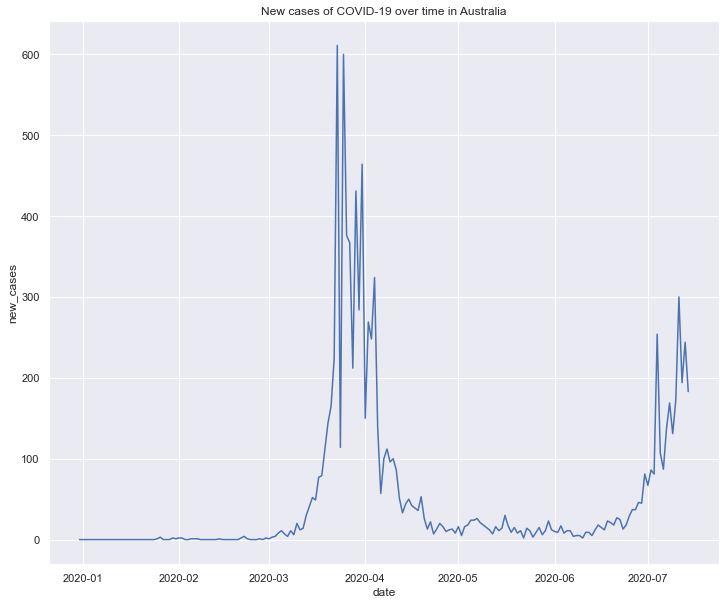

In [46]:
show_country('Australia')

<u><p style='font-size:17px;font-weight:bold'>Australia</p></u>
The new cases over time graph in Australia shows a large peak in cases which gradually decreases, but eventually leads into another upward trend that resembles the first peak. According to Packham (2020), Australian government officials apologized for the mishandling of the Ruby Princess outbreak, which is said to be Australia's worst outbreak at the time. Looking closer into the Ruby Princess outbreak incident, it was reported by BBC News (2020) that at least 900 people on board the cruise ship tested positive for COVID-19 around March 19. It was stated that due to an oversight by NSW health, these passengers were allowed to return home without any precautions, potentially spreading the virus in public transport and spaces. Looking back at the graph above, it can be said that the Ruby Princess was responsible for the initial peak in cases, as the dates and case numbers coincide
<br><br>
When it comes to the second increase in cases, it is could be due to the quarantine hotel scandal in Melbourne, as reported by Thiessen in July (2020). It is stated in the article that breaches in the hotel quarantine system contributed up to 200 cases in infections.

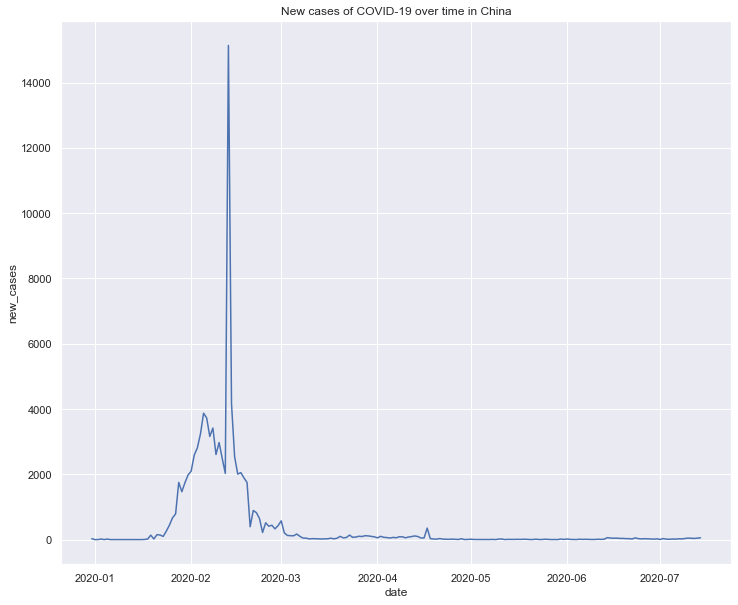

In [47]:
show_country('China')

<u><p style='font-size:17px;font-weight:bold'>China</p></u>
The graph shows a sharp increase in new cases of almost 15,000 in February. According to Gunia & Zennie (2020), the jump in new cases was due to "a change in criteria for counting diagnoses" by Chinese Authorities. This explains the sharp increase in cases which could have been mistaken as an error , as it accounts for patients that were undercounted before the change. 

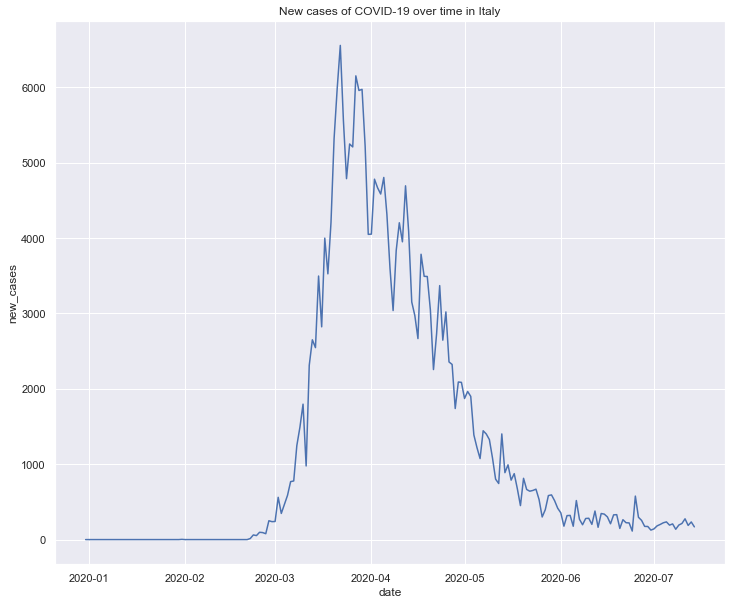

In [48]:
show_country('Italy')

<u><p style='font-size:17px;font-weight:bold'>Italy</p></u>
In Italy, COVID-19 cases begun to grew exponentially between March and April. This rise in infections was attributed to 'Game Zero', a soccer match between Atalanta and Valencia that attracted roughly 40,000 live spectators, as reported by Azzoni and Dampf on the 25th of March(2020). The article stated that 'conditions for virus contagion were high', as the outbreak in Europe was still unknown to most and people were gathering in large numbers in preparation for the soccer match.

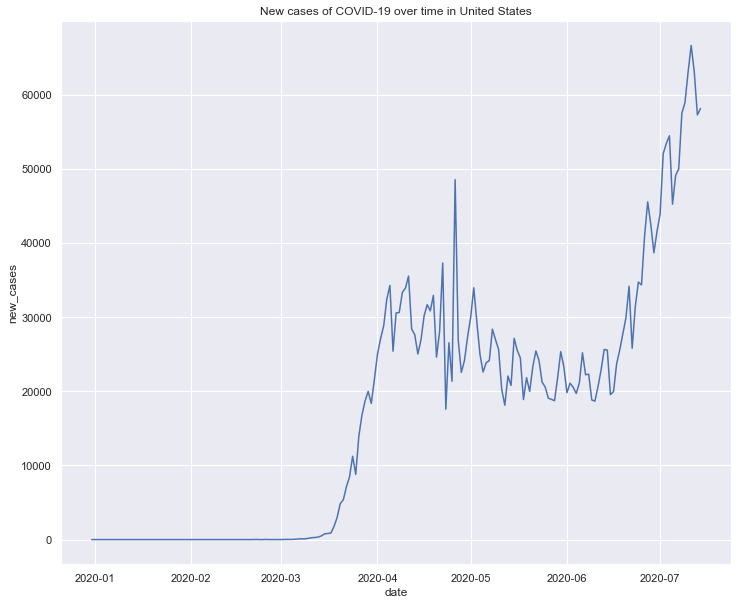

In [49]:
show_country('United States')

<u><p style='font-size:17px;font-weight:bold'>United States</p></u>
Contrary to the other line graphs, the graph of new COVID-19 cases for the United States showed a rising trend with no signs of decreasing, despite months into the pandemic. It is difficult to pin point a specific incident which led the United States into the worst infected country in the world, but it is believed that numerous mistakes and failed warnings all built up to the situation America is currently experiancing. According an article published on The Atlantic by Yong (2020), the following are a few major reasons behind United State's failure in handling the pandemic:
<ol>
    <li> Lack of personal protection equipment (PPE) </li>
    Many countries faced a shortage in PPE when handling the pandemic, but in the case for America,each state was pushed to source the equipment themselves, instead of receiving supplies from the federal government.
    <li style="margin-top:10px">Misinformation and sensationlist media </li>
    Conspiracy theories regarding the virus spread like wildfire online, bringing misinformation to the public and built a strong anti-science sentiment. The media contributed further confusion to the public through reporting on fringe anti-lockdown protests and unverified scientific claims. 
    <li style="margin-top:10px"> Lackluster response from the government officials </li>
    Rather than preparing the public for the potentially devastating virus, government officials downplayed the virus and compared it to the flu.
</ol>

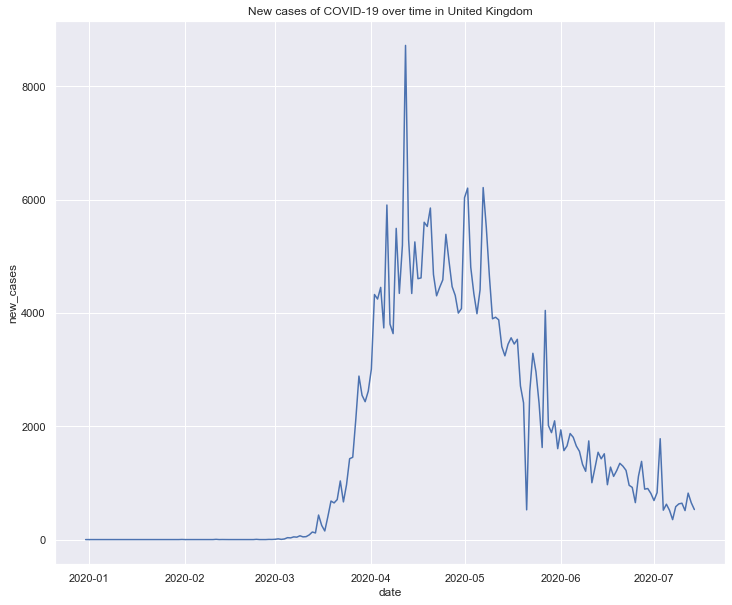

In [50]:
show_country('United Kingdom')

<u><p style='font-size:17px;font-weight:bold'>United Kingdom</p></u>

The new case counts for United Kingdom surges around April to mid May. This could be due to the government's initiative to increase testing capacities. According to the BMJ (2020), the UK government promised to increase its daily COVID-19 test count from around 10,000 to 100,000 per day by the end of April. 

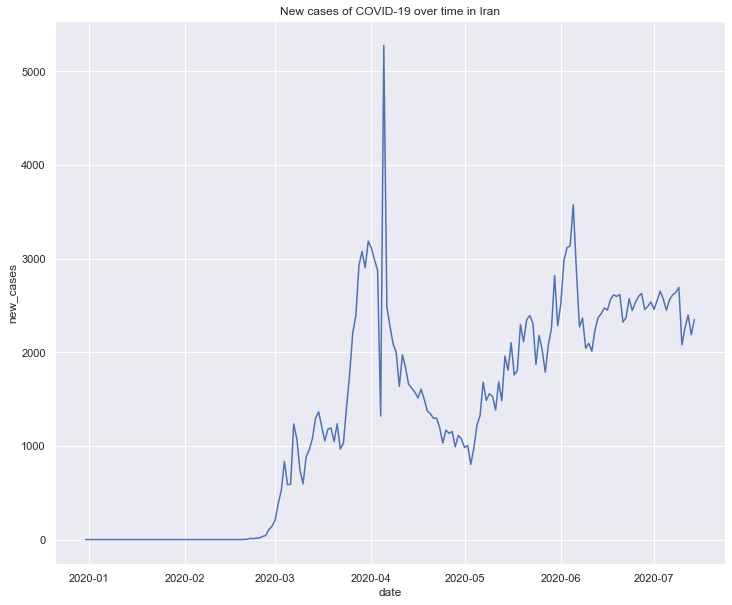

In [51]:
show_country('Iran')

<u><p style='font-size:17px;font-weight:bold'>Iran</p></u>
The peak in new cases in Iran was around the start of April, which according to Heidari and Sayfouri (2020) is due to the Iranian New Year called Nowruz, where it is customary for Iranians to visit relatives or take trips. The authors write that COVID-19 cases increased substantially on March 26th, which is the end of the Nowruz holiday. The article also mentioned that the sharp fall in cases between mid april and may as seen in the graph above was due to people returning home from the holidays.

However, Iran saw a resurgance in May which led to a new peak in cases in June. The peak was said to be caused by a wedding party after Iran has loosened lockdown restrictions (Char,2020).

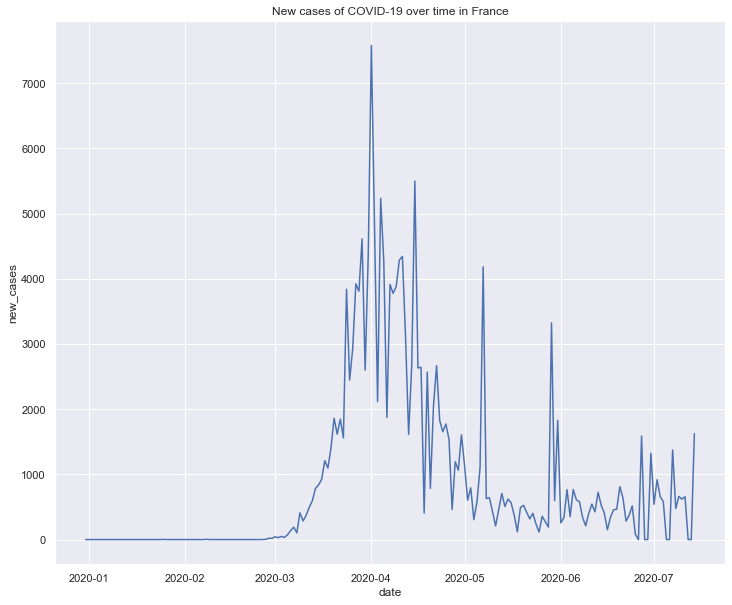

In [52]:
show_country('France')

<u><p style='font-size:17px;font-weight:bold'>France</p></u>
The peak of cases in France could be due to two incidents that happened around the start of April. Firstly, the evangelical megachurch cluster which saw a gathering of 2,500 people exposed to the virus and became one of Europe's largest reigonal clusters (McAuley,2020). Secondly, unreported cases from nursing homes also contributed to the satisitc, according to US News & World Report (2020).

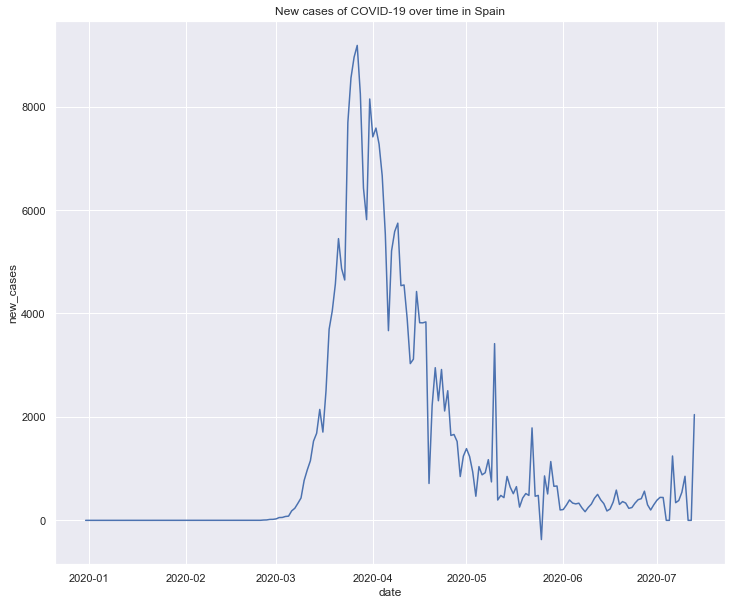

In [53]:
show_country('Spain')

<u><p style='font-size:17px;font-weight:bold'>Spain</p></u>
The new cases graph of Spain and Italy can be observed to share the same increasing timeline, which happens late into the month of March. This is due to the aforementioned Atalanta and Valencia soccer match, where 2,500 Spanish Valencia fans mixed in with Atalanta supporters (Tremlett, 2020). Besides that, The Guardian also reported that on the 8th of March, large gatherings such as sports events, political party conferences and massive demonstrations all took place. These unfortunate circumstances all contributed to the peak of almost 9,000 cases. The case numbers also reaches negative value at May, which as explained above is due to a change in counting criteria. 

### Question 2
Add a vertical line for the lockdown date to the line chart of each country which you created in the previous question and explore if the lockdown affected the trend which is shown in the plot? Is the effect similar for all countries? Why do you think so?

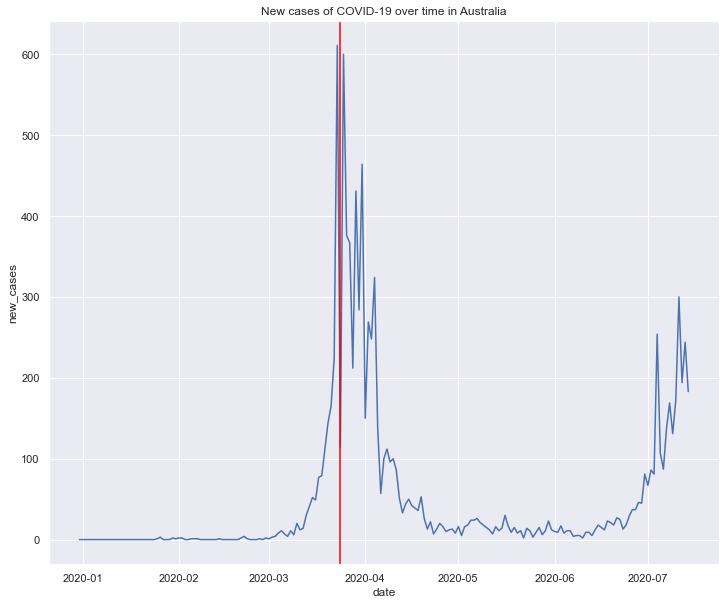

In [54]:
show_country('Australia',True)

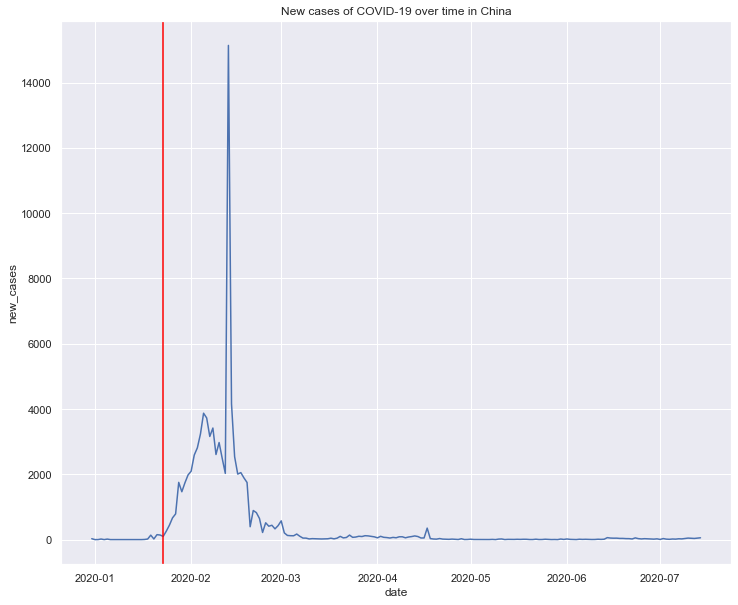

In [55]:
show_country('China',True)

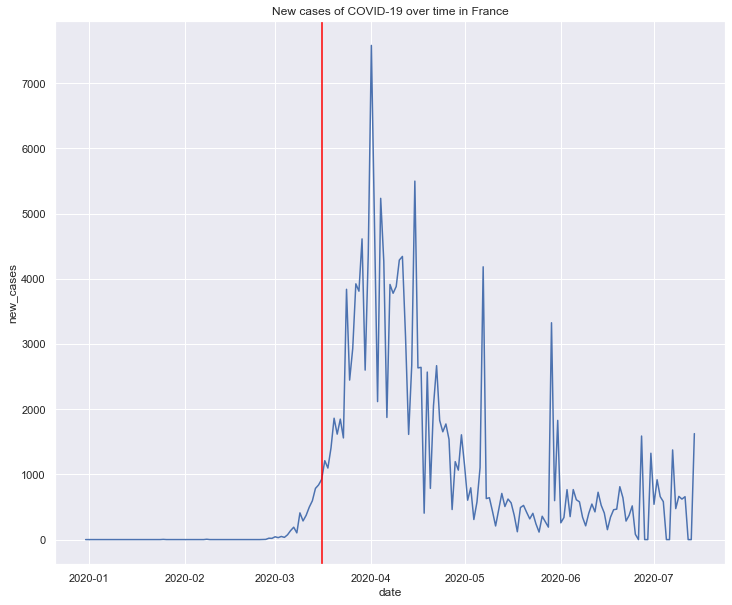

In [56]:
show_country('France',True)

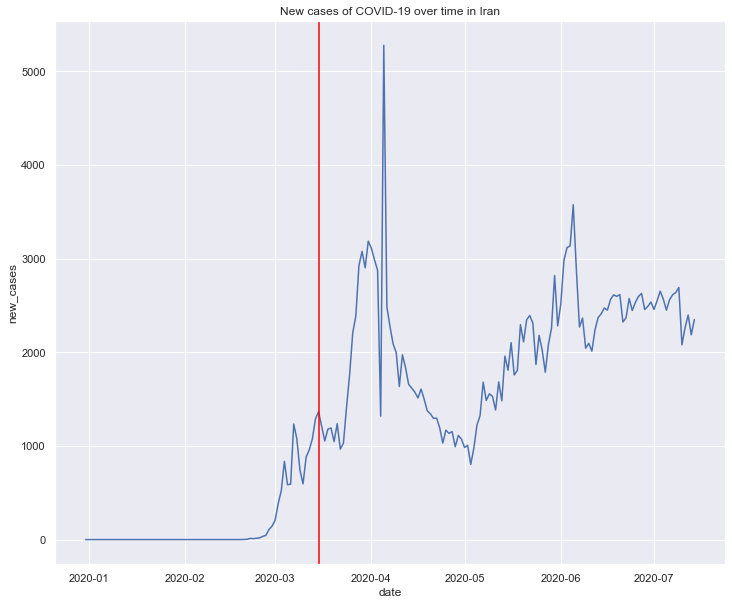

In [57]:
show_country('Iran',True)

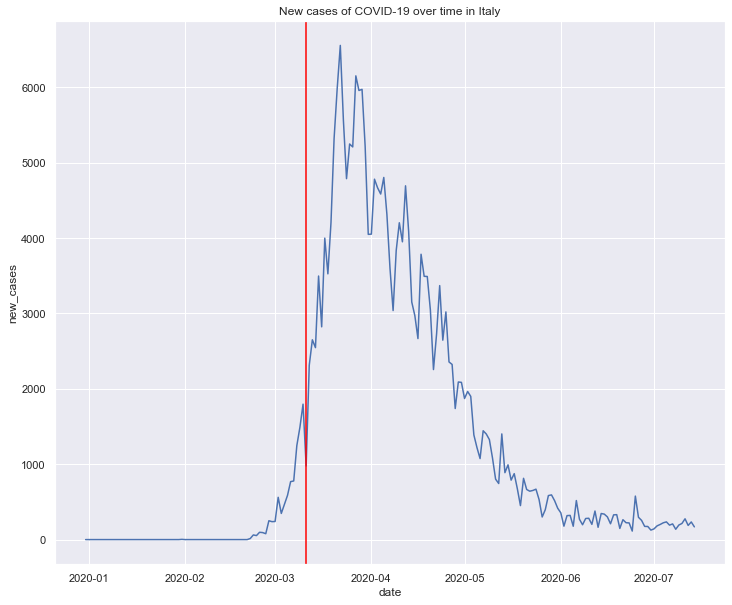

In [58]:
show_country('Italy',True)

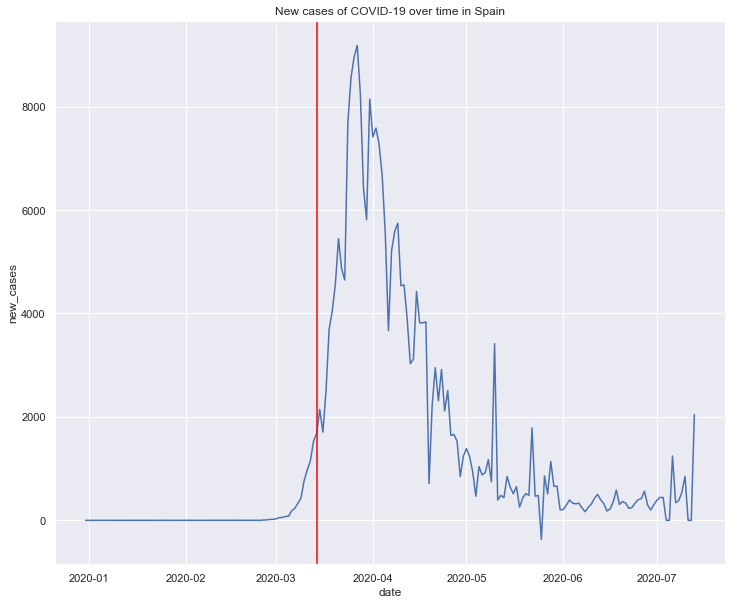

In [59]:
show_country('Spain',True)

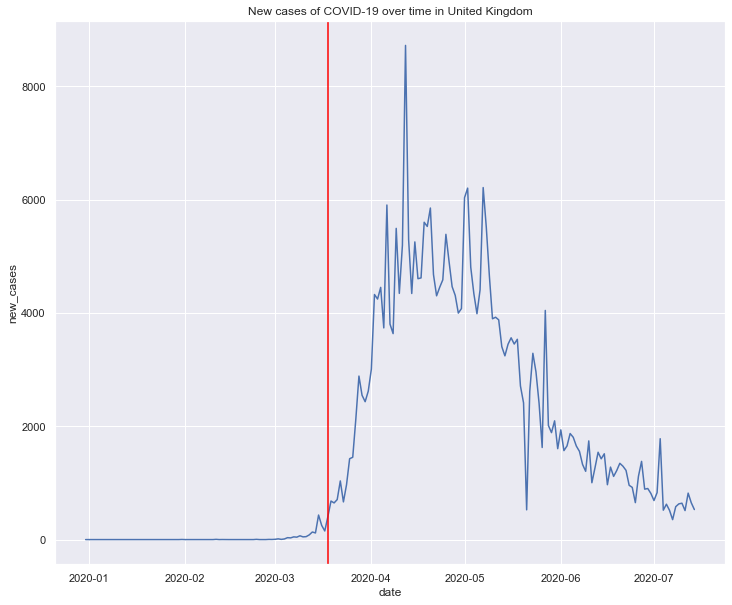

In [60]:
show_country('United Kingdom',True)

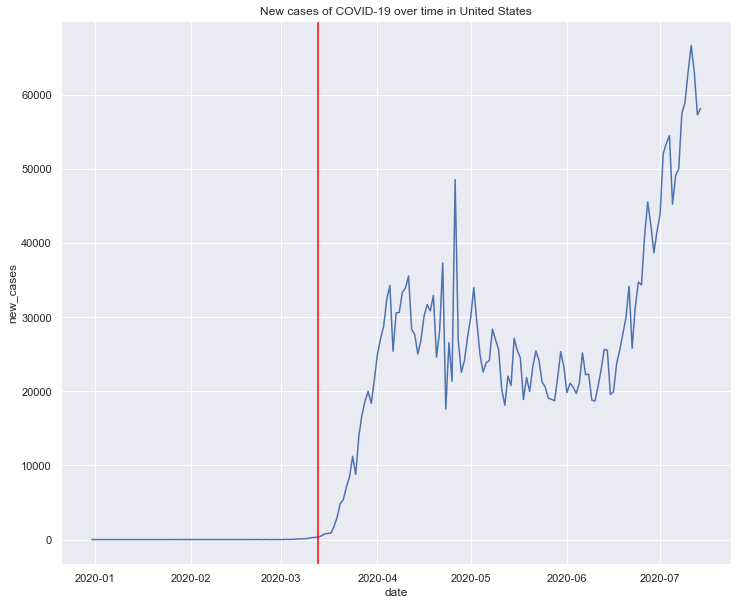

In [61]:
show_country('United States',True)

With the lockdown dates of each country plotted, it is observed that some of the graphs share close lockdown dates and trends. For example, all the European countries listed in the data have lockdown dates within a week from 11th March, where Italy first imposed lockdown. Therefore, the analysis of the effects of lockdown on the countries will be split into 5 groups, which are Europe, United States, China , Iran and Australia.

<u><p style='font-size:17px;font-weight:bold'>Europe</p></u>
For the European countries, it is observed that cases often peak after imposing lockdown, which is then followed by a gradual decrease in cases. Flaxman et al. (2020) has shown in a study that 'major non-pharmaceutical interventions' such as closing schools and implementing lockdown had a big effect on reducing the spread of COVID-19 in European countries. The study was done through building a model based on death records from 11 European countries and it concluded that roughly 3.1 million deaths was prevented due to lockdown or other preventive measures.

<u><p style='font-size:17px;font-weight:bold'>China</p></u>
As the origin country of COVID-19, China had the earliest lockdown date, which was imposed on January 23 in Wuhan,Hubei. During the Chinese lockdown, public transport was halted and restrictions were put on interstate travel as well as entertainment venues such as cinemas (Kuo,2020). However, the lockdown restrictions grew even more aggresive to the point where The Guardian (2020) called the lockdown 'brutal but effective'. Despite strict conditions, the lockdown was still succesful and managed to contain the virus. The visualisation above also supports this as the highest recorded daily cases (excluding the recount mentioned previously) never exceeded 4,000.

<u><p style='font-size:17px;font-weight:bold'>Australia</p></u>
The lockdown in Australia was implemented right as new cases peaked. While the lockdown did lead to decreased numbers in the following months, there are signs that a new wave of cases could occur. However, it can still be argued that lockdown in Australia was effective, as the resurgance of cases was attributed to the hotel quarantine scandal that swept through Melbourne.

<u><p style='font-size:17px;font-weight:bold'>United States</p></u>
The United States stood out amongst other countries, as months after imposing lockdown, it is the only country that showed a new peak in cases. It can be said that lockdown implementations in the U.S. was not entirely effective, as the trend only showed slight reductions. The possible reason behind this could be the lack of a national lockdown, due to the legality and ethics involved (Gostin,2020). Therefore, the poor coordination between each state and lax lockdown policies might have contributed greatly to the rising cases.

<u><p style='font-size:17px;font-weight:bold'>Iran</p></u>
The lockdown was effective in Iran where it succesfully brought cases down, but it is worth noting that violations of the lockdown by its citizens did lead the cases into an increasing trend, as explained previously.

### Question 3.  
Explore whether there is a relation between daily new case/death rate and the GDP of a country. To this aim, you need to calculate: 
*	The average of GDP of the countries, and then divide the countries into two groups, a group which its GDP is above the average GDP, and another group which its GDP is below the average GDP. We call the former group as "AboveGDP" and the later as "BelowGDP" from now onwards.
*	The daily new cases rate (new cases divided by population) for each country
*	The daily new death rate (new deaths divided by population) for each country 
        
Then, you need to create two line charts, one which shows the new case rate of groups "AboveGDP" and "BelowGDP"; and, another line chart to show the death rate of the two groups ("AboveGDP" and "BelowGDP").

    a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?
    b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?
    c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Does 
    the result of your visualisation is the same as the mentioned expectation? If no, why do you think the expectation is 
    different from the reality? 


In [62]:
df['new_cases_rate'] = df['new_cases'] / df['population']

In [63]:
df['death_cases_rate'] = df['new_deaths'] / df['population']

In [64]:
average_gdp = df['gdp_per_capita'].unique().mean()
AboveGDP = df[df['gdp_per_capita'] > average_gdp]
BelowGDP = df[df['gdp_per_capita'] < average_gdp]


In [65]:
# Average case rate and death rate for countries below average GDP
avg_caserate_below = pd.DataFrame(BelowGDP.groupby('date')['new_cases_rate'].mean())
avg_caserate_below.reset_index(inplace=True)
avg_caserate_below.columns=['date','Average_case_rate']
avg_deathrate_below = pd.DataFrame(BelowGDP.groupby('date')['death_cases_rate'].mean())
avg_deathrate_below.reset_index(inplace=True)
avg_deathrate_below.columns=['date','Average_death_rate']

# Average case rate and death rate for countries above average GDP
avg_caserate_above = pd.DataFrame(AboveGDP.groupby('date')['new_cases_rate'].mean())
avg_caserate_above.reset_index(inplace=True)
avg_caserate_above.columns=['date','Average_case_rate']
avg_deathrate_above = pd.DataFrame(AboveGDP.groupby('date')['death_cases_rate'].mean())
avg_deathrate_above.reset_index(inplace=True)
avg_deathrate_above.columns=['date','Average_death_rate']

# Merging the dataframes constructed above 
BelowGDP = pd.merge(avg_caserate_below,BelowGDP)
AboveGDP = pd.merge(avg_caserate_above,AboveGDP)
BelowGDP = pd.merge(avg_deathrate_below,BelowGDP)
AboveGDP = pd.merge(avg_deathrate_above,AboveGDP)

In [66]:
AboveGDP['GDP_Class'] = 'AboveGDP'
BelowGDP['GDP_Class'] = 'BelowGDP'
df4 = pd.merge(AboveGDP,BelowGDP,how='outer')
df4['date'] = pd.to_datetime(df4['date'])

**difference in cases due to GDP could be due to earliest date,population, political system, civil unrest, the average citizen thinks, medical care system and avalibilty, PPE.**

In [ ]:
sns.lineplot(x='date',y='Average_case_rate', data=df4,hue='GDP_Class')
plt.title('Average case rate')
plt.show()

In [ ]:
sns.lineplot(x='date',y='Average_death_rate', data=df4,hue='GDP_Class')
plt.title('Average Death rate')
plt.show()

<u><p style='font-size:17px;font-weight:bold'>a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?</p></u>

In terms of case rate, `BelowGDP` dominated `AboveGDP` in case rates until April, where the inverse happens. Therefore, `AboveGDP` usually had higher values of case rate as it had a higher daily case rate than `BelowGDP` for 4 consecutive months 

<u><p style='font-size:17px;font-weight:bold'>b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?</p></u>

Similarly to case rates, the group of countries in `BelowGDP` usually had higher death rates until April, where `AboveGDP` started to dominate in terms of death rates.

<u><p style='font-size:17px;font-weight:bold'>c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower
than group "BelowGDP". Is the result of your visualisation the same as the mentioned
expectation? If no, why do you think the expectation is different from the reality?</p></u>

The visualisation does not support the expectation that countries in `AboveGDP` had lower case and death rate than countries in `BelowGDP`. Firstly, we take a look into countries in both groups:
<ul> <u>Above GDP</u>
    <li>Australia</li>
    <li>France</li>
    <li>Italy</li>
    <li>United Kingdom</li>
    <li>United States</li>
</ul>

<ul> <u>Below GDP</u>
    <li>China</li>
    <li>Iran</li>
    <li>Spain</li>
</ul>

One of the reasons why countries in the `BelowGDP` group had lower rates could be due to strict lockdown policies compared to the `AboveGDP` group. China, Spain and Iran are all reported to have strict national lockdowns where non-essential business and activities are forced to shut down. Although countries above the average GDP such as France and Italy did impose lockdown as well, United States did have reports of demonstrations against lockdowns. Therefore, there exists more anti-lockdown sentiments that could have led the `AboveGDP` group into more death and case rates.

# Referances
Allen, N., Khalip, A., & Heirtage, T. (2020). Spain revises coronavirus death toll down by nearly 2,000. Reuters. Retrieved 5 September 2020, from https://www.reuters.com/article/us-health-coronavirus-spain-tally-idUSKBN2311LD.

Azzoni, T., & Dampf, A. (2020). Game Zero: Spread of virus linked to Champions League match. AP NEWS. Retrieved 5 September 2020, from https://apnews.com/ae59cfc0641fc63afd09182bb832ebe2.

Char, P. (2020). Iranian wedding party fuelled new COVID-19 surge, President Rouhani says. Reuters. Retrieved 5 September 2020, from https://www.reuters.com/article/us-health-coronavirus-iran/iranian-wedding-party-fuelled-new-covid-19-surge-president-rouhani-says-idUSKBN23D0EO.

Coronavirus: 'Serious mistakes' made over Ruby Princess outbreak. BBC News. (2020). Retrieved 5 September 2020, from https://www.bbc.com/news/world-australia-53776285.

Felix, B., De Clercq, G., Clarke, D., MacSwan, A., & Wallis, D. (2020). French Coronavirus Death Toll Hits New High as Nursing Home Tally Swells. U.S. News & World Report. Retrieved 5 September 2020, from https://www.usnews.com/news/world/articles/2020-04-04/daily-coronavirus-death-toll-in-france-slows-to-441.

Flaxman, S., Mishra, S., Gandy, A. et al. Estimating the effects of non-pharmaceutical interventions on COVID-19 in Europe. Nature 584, 257–261 (2020). https://doi.org/10.1038/s41586-020-2405-7

Gostin, L., & Wetter, S. (2020). Why There’s No National Lockdown. The Atlantic. Retrieved 6 September 2020, from https://www.theatlantic.com/ideas/archive/2020/03/why-theres-no-national-lockdown/609127/.

Graham-Harrison, E., & Kuo, L. (2020). China's coronavirus lockdown strategy: brutal but effective. the Guardian. Retrieved 6 September 2020, from https://www.theguardian.com/world/2020/mar/19/chinas-coronavirus-lockdown-strategy-brutal-but-effective.

Gunia, A., & Zennie, M. (2020). Why China's Huge Increase in New COVID-19 Cases Is Actually a Step in the Right Direction. Time. Retrieved 5 September 2020, from https://time.com/5783401/covid19-hubei-cases-classification/.

Heidari, M., & Sayfouri, N. (2020). Did Persian Nowruz Aggravate the 2019 Coronavirus Disease Crisis in Iran?. Disaster Medicine And Public Health Preparedness, 1(2). https://doi.org/10.1017/dmp.2020.178

Kuo, L. (2020). China virus: ten cities locked down and Beijing festivities scrapped. the Guardian. Retrieved 6 September 2020, from https://www.theguardian.com/world/2020/jan/23/coronavirus-panic-spreads-in-china-with-three-cities-in-lockdown.

Lacobucci, G. (2020). Covid-19: government promises 100 000 tests per day in England by end of April. The BMJ, 369(m1392). https://doi.org/https://doi.org/10.1136/bmj.m1392

Maqbool, A. (2020). Coronavirus: The US resistance to a continued lockdown. BBC News. Retrieved 6 September 2020, from https://www.bbc.com/news/world-us-canada-52417610.

McAuley, J. (2020). How a prayer meeting at a French megachurch may have led to scores of coronavirus deaths. Washington Post. Retrieved 5 September 2020, from https://www.washingtonpost.com/world/europe/how-a-prayer-meeting-at-a-french-megachurch-may-have-led-to-scores-of-coronavirus-deaths/2020/04/01/fe478ca0-7396-11ea-ad9b-254ec99993bc_story.html.

Packham, C. (2020). Australian state premier apologises for cruise ship failures after COVID-19 spike. The Star. Retrieved 5 September 2020, from https://www.thestar.com.my/news/world/2020/08/17/australia039s-victoria-reports-deadliest-day-of-pandemic-with-25-fatalities.

Thiessen, T. (2020). Australia: New Coronavirus Lockdown Melbourne Amid Sex, Lies, Quarantine Hotel Scandal. Forbes. Retrieved 5 September 2020, from https://www.forbes.com/sites/tamarathiessen/2020/07/07/australia-coronavirus-melbourne-lockdown-hotel-sex-scandal/#452d4c06131d.

Tremlett, G. (2020). How did Spain get its coronavirus response so wrong?. the Guardian. Retrieved 5 September 2020, from https://www.theguardian.com/world/2020/mar/26/spain-coronavirus-response-analysis.

Yong, E. (2020). How the Pandemic Defeated America. The Atlantic. Retrieved 5 September 2020, from https://www.theatlantic.com/magazine/archive/2020/09/coronavirus-american-failure/614191/.
